In [1]:
import pyforest
import matplotlib.pyplot as plt

##### Reading dataset:

In [2]:
data = pd.read_csv('Postures.csv')

<IPython.core.display.Javascript object>

In [3]:
data.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [4]:
print ( "Number of Rows present are :" , data.shape [ 0 ] )
print ( "Number of Columns present are :" , data.shape [ 1 ] )

Number of Rows present are : 78096
Number of Columns present are : 38


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  object 
 12  Y3      78096 non-null  object 
 13  Z3      78096 non-null  object 
 14  X4      78096 non-null  object 
 15  Y4      78096 non-null  object 
 16  Z4      78096 non-null  object 
 17  X5      78096 non-null  object 
 18  Y5      78096 non-null  object 
 19  Z5      78096 non-null  object 
 20  X6      78096 non-null  object 
 21  Y6      78096 non-null  object 
 22

In [6]:
# Converting our target variable "class" to categorical
data [ "Class" ] = data [ "Class" ].astype ( object )

In [7]:
data [ "User" ] = data [ "User" ].astype ( object )

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  object 
 1   User    78096 non-null  object 
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  object 
 12  Y3      78096 non-null  object 
 13  Z3      78096 non-null  object 
 14  X4      78096 non-null  object 
 15  Y4      78096 non-null  object 
 16  Z4      78096 non-null  object 
 17  X5      78096 non-null  object 
 18  Y5      78096 non-null  object 
 19  Z5      78096 non-null  object 
 20  X6      78096 non-null  object 
 21  Y6      78096 non-null  object 
 22

In [9]:
data.columns

Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],
      dtype='object')

In [10]:
cols = ['X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11']
data[cols] = data[cols].replace({'?':np.NaN})

<IPython.core.display.Javascript object>

In [11]:
data.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data [ "X3" ] = data [ "X3" ].astype (float)
data [ "Y3" ] = data [ "Y3" ].astype (float)
data [ "Z3" ] = data [ "Z3" ].astype (float)

In [13]:
data [ "X4" ] = data [ "X4" ].astype (float)
data [ "Y4" ] = data [ "Y4" ].astype (float)
data [ "Z4" ] = data [ "Z4" ].astype (float)

In [14]:
data [ "X5" ] = data [ "X5" ].astype (float)
data [ "Y5" ] = data [ "Y5" ].astype (float)
data [ "Z5" ] = data [ "Z5" ].astype (float)

In [15]:
data [ "X6" ] = data [ "X6" ].astype (float)
data [ "Y6" ] = data [ "Y6" ].astype (float)
data [ "Z6" ] = data [ "Z6" ].astype (float)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  object 
 1   User    78096 non-null  object 
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      77406 non-null  float64
 12  Y3      77406 non-null  float64
 13  Z3      77406 non-null  float64
 14  X4      74976 non-null  float64
 15  Y4      74976 non-null  float64
 16  Z4      74976 non-null  float64
 17  X5      65073 non-null  float64
 18  Y5      65073 non-null  float64
 19  Z5      65073 non-null  float64
 20  X6      52248 non-null  float64
 21  Y6      52248 non-null  float64
 22

In [17]:
data['Class'].value_counts()

3    16344
1    16265
5    15733
2    14978
4    14775
0        1
Name: Class, dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

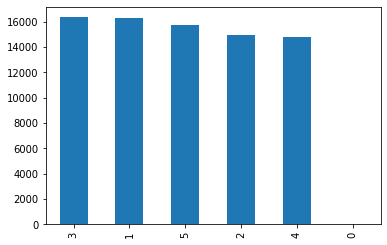

In [19]:
data['Class'].value_counts().plot.bar()

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X0,78096.0,50.345664,32.696173,-108.552738,29.295062,54.619964,72.488686,190.017835
Y0,78096.0,85.812051,40.204363,-98.233756,63.494432,86.526246,113.107355,169.175464
Z0,78096.0,-29.984712,34.361918,-126.770872,-56.356438,-30.864125,-1.418803,113.345119
X1,78096.0,49.595209,32.478238,-111.685241,28.755137,54.215514,71.762039,188.691997
Y1,78096.0,86.192647,40.453214,-96.142589,64.154529,87.542751,116.219398,170.209350
Z1,78096.0,-29.509202,34.764398,-166.006838,-57.360107,-30.184005,-0.366692,104.697852
X2,78096.0,48.612121,33.605390,-106.886524,25.170006,53.814580,71.561951,188.760168
Y2,78096.0,83.771315,41.023543,-100.789312,58.052385,86.458324,106.660827,168.186466
Z2,78096.0,-30.560515,35.120329,-129.595296,-58.654059,-32.352414,-0.944786,104.590879
X3,77406.0,48.491947,33.873346,-111.761053,23.860321,54.136412,71.435463,151.033472


## Checking for null

In [21]:
data.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

In [22]:
data.isnull().sum ( ) / data.shape [ 0 ] * 100  

Class     0.000000
User      0.000000
X0        0.000000
Y0        0.000000
Z0        0.000000
X1        0.000000
Y1        0.000000
Z1        0.000000
X2        0.000000
Y2        0.000000
Z2        0.000000
X3        0.883528
Y3        0.883528
Z3        0.883528
X4        3.995083
Y4        3.995083
Z4        3.995083
X5       16.675630
Y5       16.675630
Z5       16.675630
X6       33.097726
Y6       33.097726
Z6       33.097726
X7       50.133169
Y7       50.133169
Z7       50.133169
X8       60.863553
Y8       60.863553
Z8       60.863553
X9       69.309568
Y9       69.309568
Z9       69.309568
X10      81.109148
Y10      81.109148
Z10      81.109148
X11      99.959025
Y11      99.959025
Z11      99.959025
dtype: float64

We can see that we have few columns that has more than 50% missing values. It is better to remove them.

In [23]:
data.drop(['X7','Y7','Z7','X8','Y8','Z8','X9','Y9','Z9','X10','Y10','Z10','X11','Y11','Z11'], axis=1, inplace=True)

In [24]:
data.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-73.684130,59.188576,10.678936,-71.297781,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-70.703991,61.587452,11.779919,-68.827418,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-71.138344,61.686427,11.793440,-68.889316,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-68.956425,77.387225,42.717833,-72.015146,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  object 
 1   User    78096 non-null  object 
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      77406 non-null  float64
 12  Y3      77406 non-null  float64
 13  Z3      77406 non-null  float64
 14  X4      74976 non-null  float64
 15  Y4      74976 non-null  float64
 16  Z4      74976 non-null  float64
 17  X5      65073 non-null  float64
 18  Y5      65073 non-null  float64
 19  Z5      65073 non-null  float64
 20  X6      52248 non-null  float64
 21  Y6      52248 non-null  float64
 22

## Treating missing values with mean

In [26]:
data=data.fillna(data.mean())

In [27]:
data.isnull().sum()

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
X5       0
Y5       0
Z5       0
X6       0
Y6       0
Z6       0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  float64
 12  Y3      78096 non-null  float64
 13  Z3      78096 non-null  float64
 14  X4      78096 non-null  float64
 15  Y4      78096 non-null  float64
 16  Z4      78096 non-null  float64
 17  X5      78096 non-null  float64
 18  Y5      78096 non-null  float64
 19  Z5      78096 non-null  float64
 20  X6      78096 non-null  float64
 21  Y6      78096 non-null  float64
 22

In [29]:
data.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-73.684130,59.188576,10.678936,-71.297781,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-70.703991,61.587452,11.779919,-68.827418,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-71.138344,61.686427,11.793440,-68.889316,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-68.956425,77.387225,42.717833,-72.015146,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728


In [30]:
categorical = list ( data.select_dtypes ( include = "object" ).columns )
print ( "Categorical features:\n" , categorical )
print ( "\n" )
numerical = list ( data.select_dtypes ( exclude = "object" ).columns )
print ( "Continous features:\n" , numerical )

Categorical features:
 []


Continous features:
 ['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6']


In [31]:
for i in categorical:
    print ( "Countplot for feature:" , i )
    sns.countplot ( data [ i ] )
    plt.show ( )

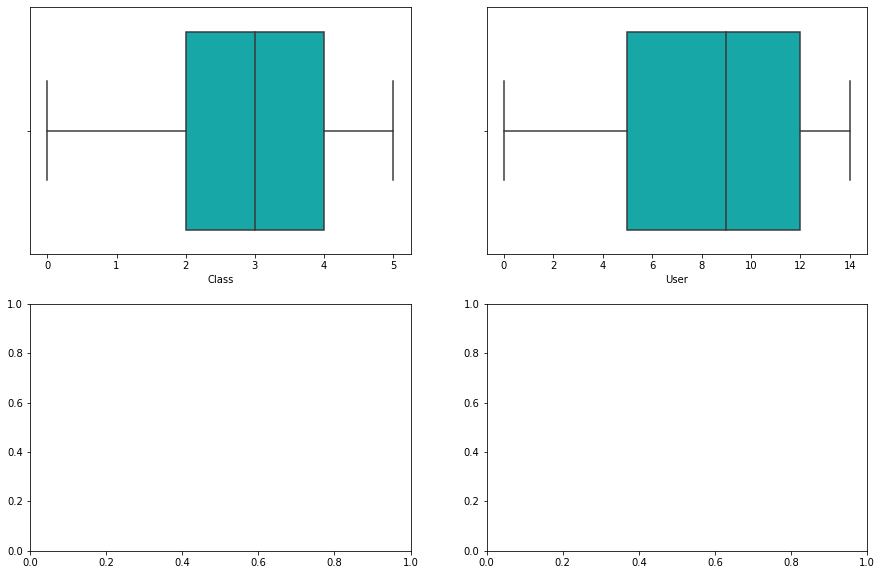

In [32]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data['Class'],  color="c", ax=axes[0, 0])
sns.boxplot(data['User'],  color="c", ax=axes[0, 1])

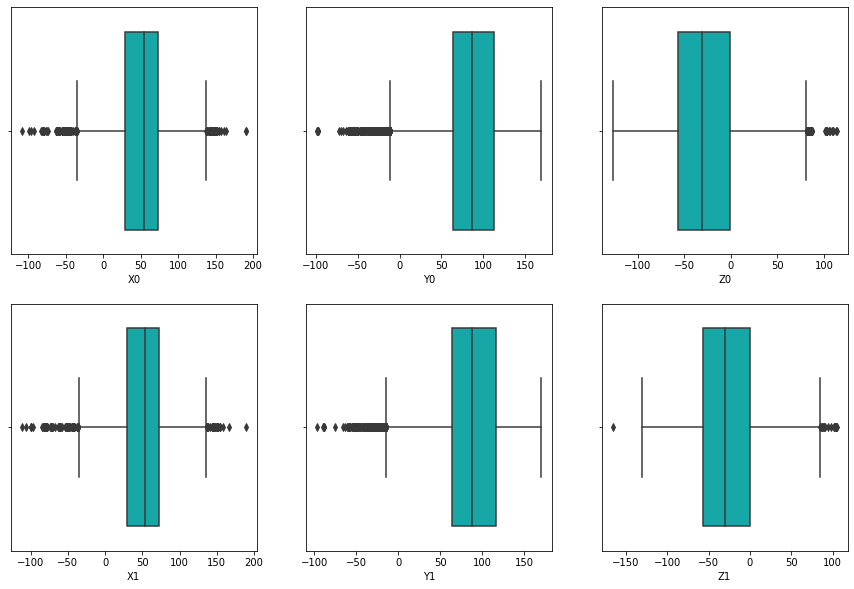

In [33]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data['X0'],  color="c", ax=axes[0, 0])
sns.boxplot(data['Y0'],  color="c", ax=axes[0, 1])
sns.boxplot(data['Z0'],  color="c", ax=axes[0, 2])
sns.boxplot(data['X1'],  color="c", ax=axes[1, 0])
sns.boxplot(data['Y1'],  color="c", ax=axes[1, 1])
sns.boxplot(data['Z1'],  color="c", ax=axes[1, 2])
plt.show()

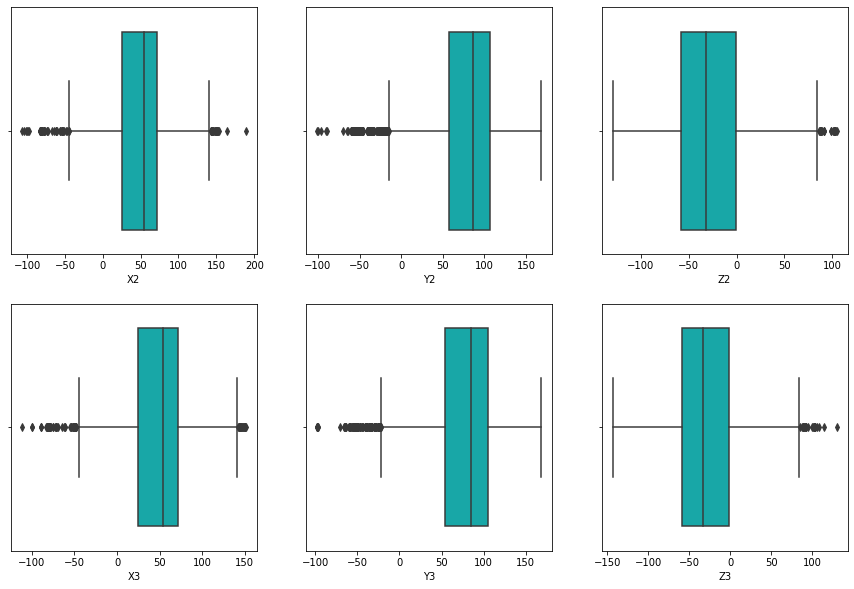

In [34]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data['X2'],  color="c", ax=axes[0, 0])
sns.boxplot(data['Y2'],  color="c", ax=axes[0, 1])
sns.boxplot(data['Z2'],  color="c", ax=axes[0, 2])
sns.boxplot(data['X3'],  color="c", ax=axes[1, 0])
sns.boxplot(data['Y3'],  color="c", ax=axes[1, 1])
sns.boxplot(data['Z3'],  color="c", ax=axes[1, 2])
plt.show()

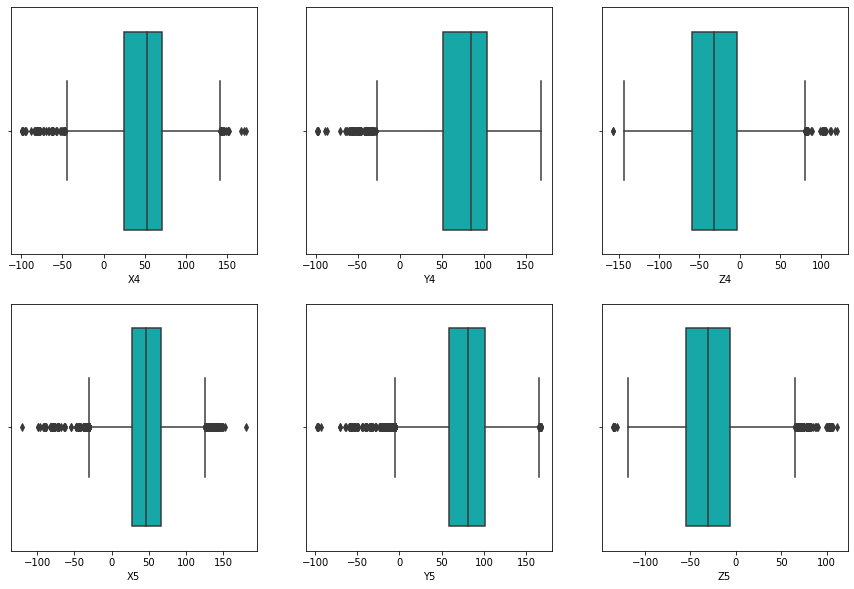

In [35]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data['X4'],  color="c", ax=axes[0, 0])
sns.boxplot(data['Y4'],  color="c", ax=axes[0, 1])
sns.boxplot(data['Z4'],  color="c", ax=axes[0, 2])
sns.boxplot(data['X5'],  color="c", ax=axes[1, 0])
sns.boxplot(data['Y5'],  color="c", ax=axes[1, 1])
sns.boxplot(data['Z5'],  color="c", ax=axes[1, 2])
plt.show()

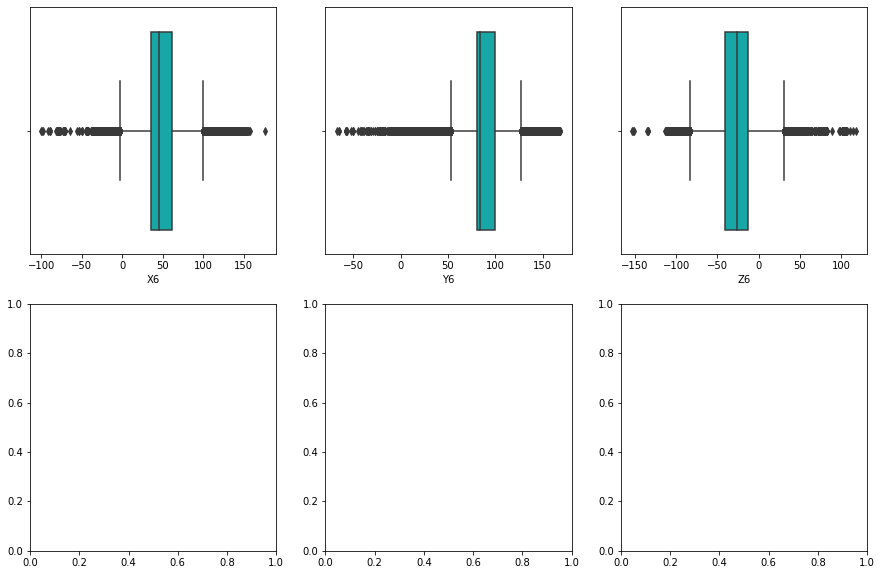

In [36]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data['X6'],  color="c", ax=axes[0, 0])
sns.boxplot(data['Y6'],  color="c", ax=axes[0, 1])
sns.boxplot(data['Z6'],  color="c", ax=axes[0, 2])

plt.show()

distplot for feature: Class
Skewness for Class is: 0.01431789566817375


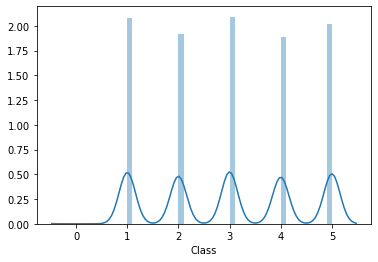

distplot for feature: User
Skewness for User is: -0.48061131693057785


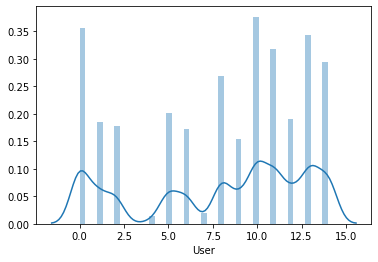

distplot for feature: X0
Skewness for X0 is: -0.30807547606244945


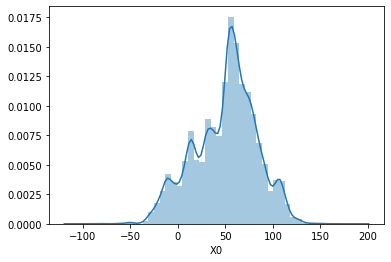

distplot for feature: Y0
Skewness for Y0 is: -0.2791227537143223


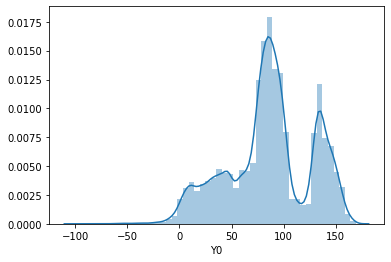

distplot for feature: Z0
Skewness for Z0 is: 0.11567701507714667


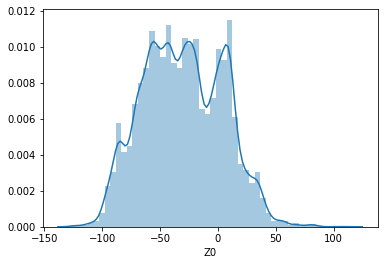

distplot for feature: X1
Skewness for X1 is: -0.3077319868944942


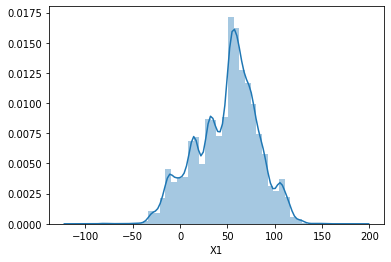

distplot for feature: Y1
Skewness for Y1 is: -0.354129887444386


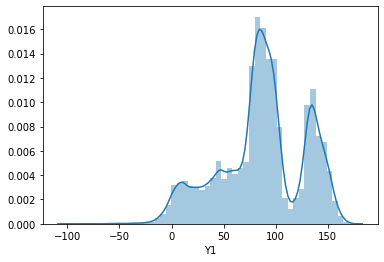

distplot for feature: Z1
Skewness for Z1 is: 0.10776091691389508


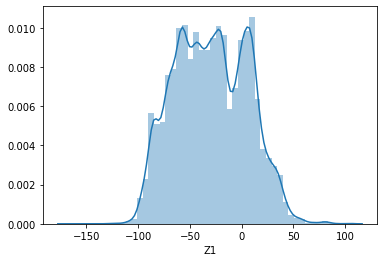

distplot for feature: X2
Skewness for X2 is: -0.2695575063886308


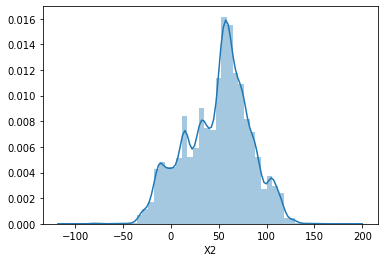

distplot for feature: Y2
Skewness for Y2 is: -0.32980600395624543


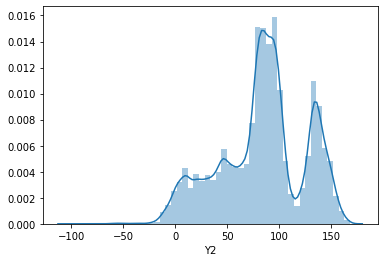

distplot for feature: Z2
Skewness for Z2 is: 0.18183507198121684


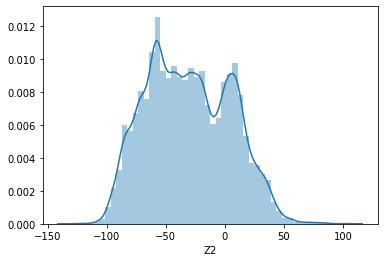

distplot for feature: X3
Skewness for X3 is: -0.26889311871599514


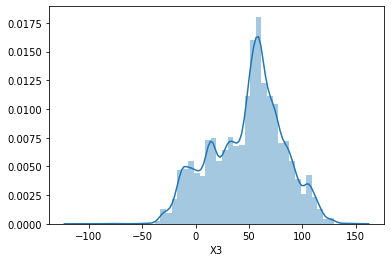

distplot for feature: Y3
Skewness for Y3 is: -0.3062649981659214


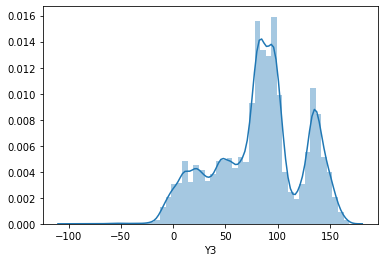

distplot for feature: Z3
Skewness for Z3 is: 0.2649005142699417


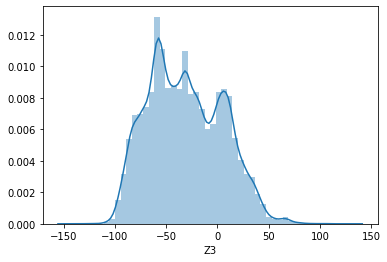

distplot for feature: X4
Skewness for X4 is: -0.27575554520029577


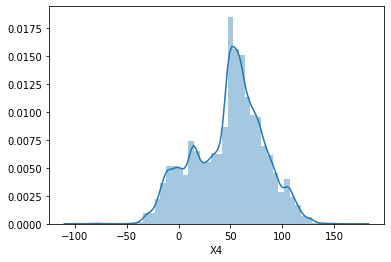

distplot for feature: Y4
Skewness for Y4 is: -0.28806927382954445


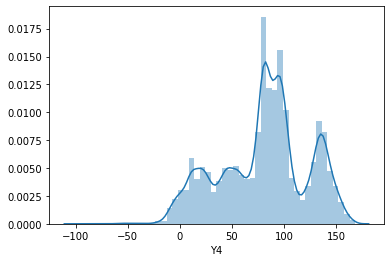

distplot for feature: Z4
Skewness for Z4 is: 0.28335095799115095


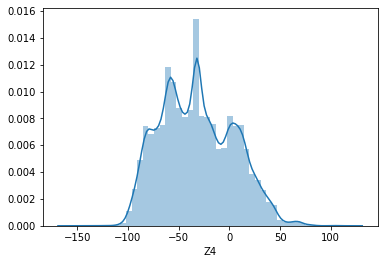

distplot for feature: X5
Skewness for X5 is: -0.23474906863624745


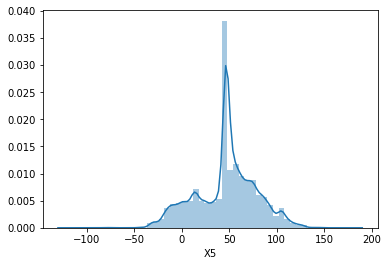

distplot for feature: Y5
Skewness for Y5 is: -0.34534480964152436


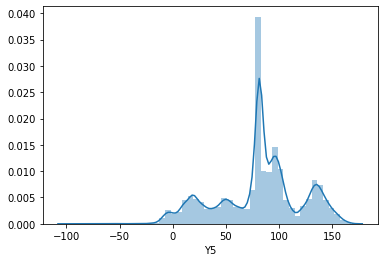

distplot for feature: Z5
Skewness for Z5 is: 0.15629258554522393


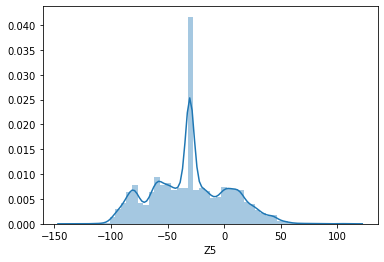

distplot for feature: X6
Skewness for X6 is: -0.2218098575366678


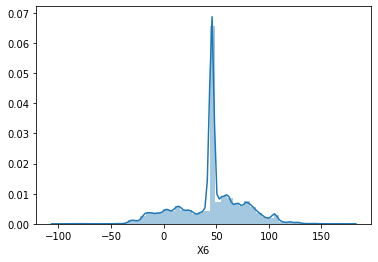

distplot for feature: Y6
Skewness for Y6 is: -0.5154961391569917


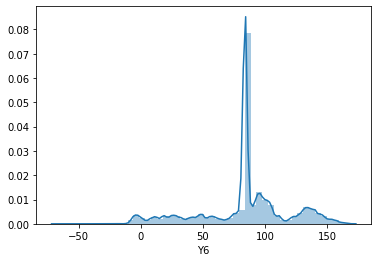

distplot for feature: Z6
Skewness for Z6 is: 0.03284110885304525


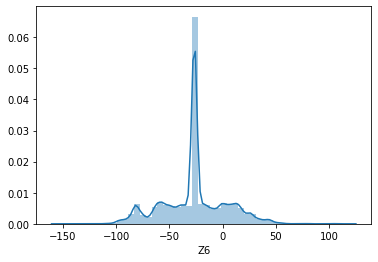

In [37]:
for i in numerical:
    print ( "distplot for feature:" , i )
    print ( "Skewness for" , i , "is:" , data [ i ].skew ( ) )
    sns.distplot ( data [ i ] )
    plt.show ( )

## Dropping class 0

In [38]:
data.drop(data[data['Class'] == '0'].index,axis=0, inplace = True) 

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [39]:
data.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-73.684130,59.188576,10.678936,-71.297781,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-70.703991,61.587452,11.779919,-68.827418,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-71.138344,61.686427,11.793440,-68.889316,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-68.956425,77.387225,42.717833,-72.015146,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728


In [40]:
data['Class'].value_counts()

3    16344
1    16265
5    15733
2    14978
4    14775
0        1
Name: Class, dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78096 entries, 0 to 78095
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  float64
 12  Y3      78096 non-null  float64
 13  Z3      78096 non-null  float64
 14  X4      78096 non-null  float64
 15  Y4      78096 non-null  float64
 16  Z4      78096 non-null  float64
 17  X5      78096 non-null  float64
 18  Y5      78096 non-null  float64
 19  Z5      78096 non-null  float64
 20  X6      78096 non-null  float64
 21  Y6      78096 non-null  float64
 22

To find the correlation we convert our target variable to integer and check the correlation using pairplot

In [42]:
# Converting target variable to categorrical.
data [ "Class" ] = data [ "Class" ].astype ( int )

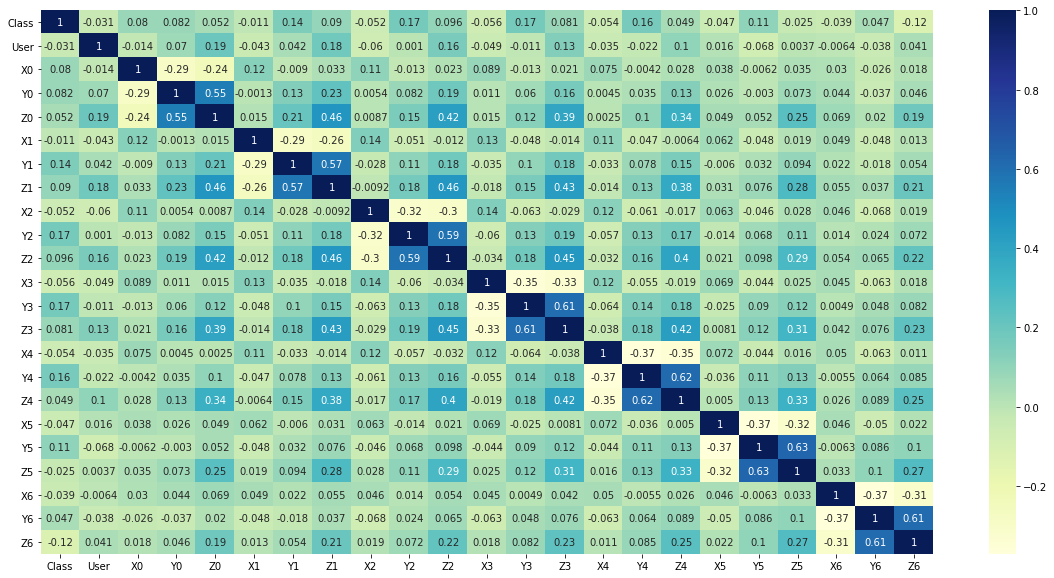

In [43]:
f , ax = plt.subplots ( figsize = ( 20 , 10 ) )
sns.heatmap ( data.corr ( ) , cmap = "YlGnBu" , annot = True )
plt.show ( )

In [44]:
target = data.corr ( )
target = target [ "Class" ]
print ( target )

Class    1.000000
User    -0.030667
X0       0.080209
Y0       0.081808
Z0       0.051832
X1      -0.010528
Y1       0.144135
Z1       0.089894
X2      -0.052351
Y2       0.169296
Z2       0.095512
X3      -0.055662
Y3       0.168206
Z3       0.081065
X4      -0.054243
Y4       0.162940
Z4       0.049465
X5      -0.046960
Y5       0.106921
Z5      -0.024716
X6      -0.038995
Y6       0.046814
Z6      -0.118293
Name: Class, dtype: float64


## Model - 1

Dropping the user feature

In [45]:
data = data.drop ( "User" , axis = 1 )

In [46]:
data.head()

,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,...,-73.684130,59.188576,10.678936,-71.297781,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728
2,1,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,...,-70.703991,61.587452,11.779919,-68.827418,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728
3,1,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,...,-71.138344,61.686427,11.793440,-68.889316,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728
4,1,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,...,-68.956425,77.387225,42.717833,-72.015146,47.042055,81.393686,-30.269905,45.676824,83.730711,-26.638728


## Decision Tree

In [47]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10 )
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
!pip install pydotplus

In [50]:
!pip install graphviz

In [51]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

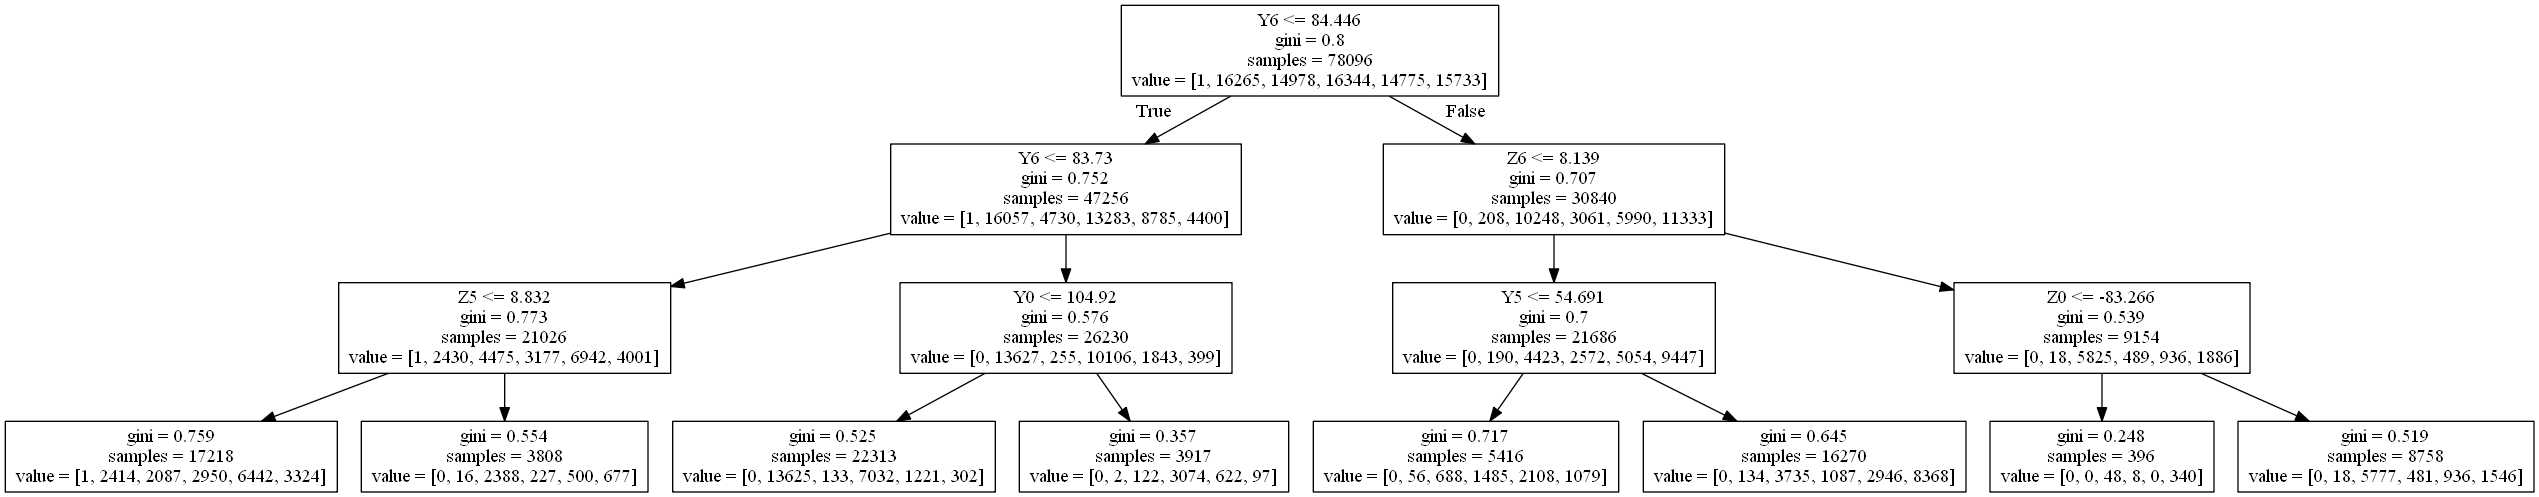

In [53]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus


features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [55]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.9248367407913269


# Hyper Tuning 

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , roc_auc_score

In [57]:
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : sp_randint(2,10),
        'min_samples_split': sp_randint(2,50),
        'min_samples_leaf': sp_randint(1,20),
         'criterion':['gini', 'entropy']}

rand_search = RandomizedSearchCV(dt, param_distributions=params, cv=3, 
                                 random_state=1)

rand_search.fit(X, y)
print(rand_search.best_params_)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 14, 'min_samples_split': 8}


In [58]:
dt = DecisionTreeClassifier(**rand_search.best_params_)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.8443850952128341
Accuracy of Decision Tree-Test:  0.8274360834862777


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier(n_estimators=10, random_state=1)

rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Random Forest-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Random Forest-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Random Forest-Train:  0.9991036640020488
Accuracy of Random Forest-Test:  0.9564215288744718


In [61]:
print ( classification_report (y_pred, y_test) )

              precision    recall  f1-score   support

           1       1.00      0.99      0.99      4969
           2       0.94      0.92      0.93      4600
           3       0.96      0.96      0.96      4897
           4       0.93      0.95      0.94      4281
           5       0.95      0.96      0.96      4682

    accuracy                           0.96     23429
   macro avg       0.96      0.96      0.96     23429
weighted avg       0.96      0.96      0.96     23429



## Hyper Tuning

In [62]:
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=1)

params = {'n_estimators': sp_randint(5,25),
    'criterion': ['gini', 'entropy'],
    'max_depth': sp_randint(2, 10),
    'min_samples_split': sp_randint(2,20),
    'min_samples_leaf': sp_randint(1, 20),
    'max_features': sp_randint(2,15)}

rand_search_rfc = RandomizedSearchCV(rfc, param_distributions=params,
                                 cv=3, random_state=1)

rand_search_rfc.fit(X, y)
print(rand_search_rfc.best_params_)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


{'criterion': 'entropy', 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 3, 'n_estimators': 17}


In [63]:
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)

rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Random Forest-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Random Forest-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Random Forest-Train:  0.9048420436460753
Accuracy of Random Forest-Test:  0.8870203593836699


## k-NN Classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_prob_train = knn.predict_proba(X_train)[:,1]

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of kNN-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of kNN-Test: ', accuracy_score(y_pred, y_test))

## Hyper Tuning

In [ ]:
knn = KNeighborsClassifier()

params = {'n_neighbors': sp_randint(1,25),
        'p': sp_randint(1,5)}

rand_search_knn = RandomizedSearchCV(knn, param_distributions=params,
                                 cv=3, random_state=1)
rand_search_knn.fit(X, y)
print(rand_search.best_params_)

In [ ]:
knn = KNeighborsClassifier(**rand_search_knn.best_params_)

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_prob_train = knn.predict_proba(X_train)[:,1]

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of KNN-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of KNN-Test: ', accuracy_score(y_pred, y_test))